In [1]:
import os
from pandas import DataFrame, read_csv
import numpy as np
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import random
%matplotlib inline

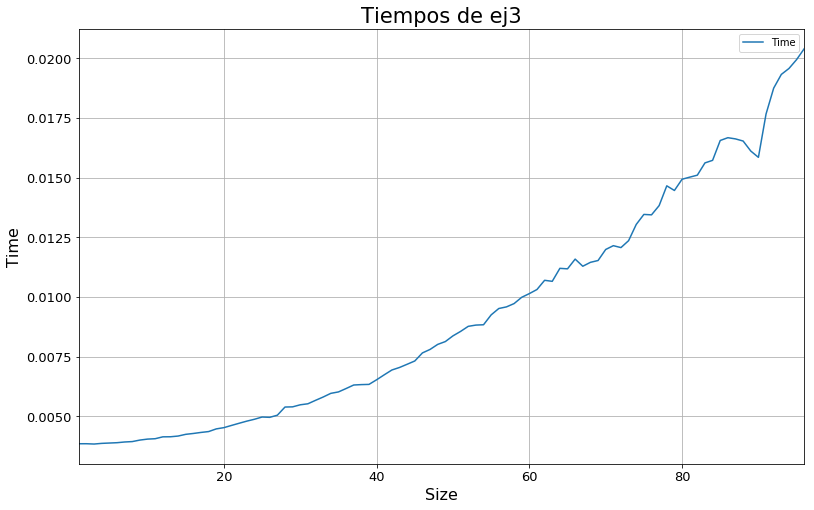

In [19]:
d3 = pd.read_csv("./timesEj3.csv")

sized3 = d3.groupby('Size')


dyn = sized3.mean().plot.line(title="Tiempos de ejecución de Dinámica", fontsize=13, figsize=(13,8), logy=False, grid=True)
dyn.set_title("Tiempos de ej3", fontsize=21)
dyn.set_ylabel("Time", fontsize=16)
dyn.set_xlabel("Size", fontsize=16)

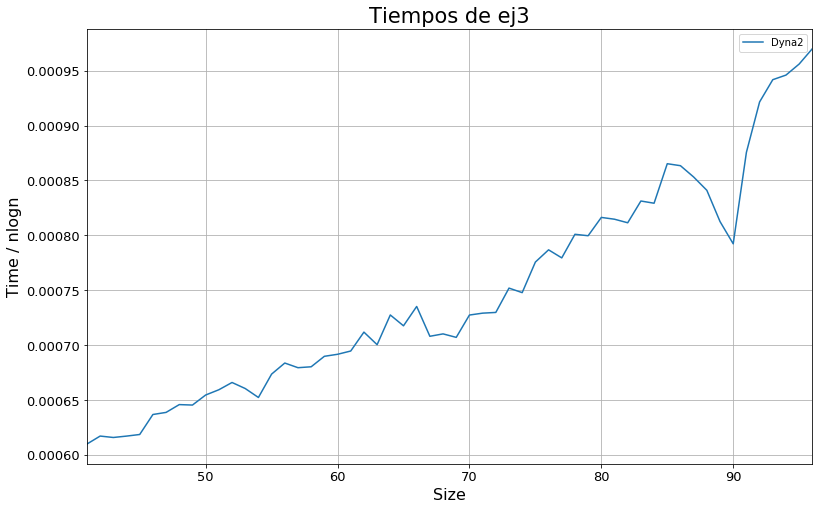

In [20]:
ddyna = pd.read_csv("./timesEj3.csv")
ddyna['Dyna2'] = ddyna['Time'] / ddyna['Size']**(1)*ddyna['Size'].apply(lambda x: log(x)  if x >= 0 else -1)
del ddyna['Time']
sizedyna = ddyna.loc[ddyna['Size'] > 40].groupby('Size')
dyna = sizedyna.mean().plot.line(fontsize=13, figsize=(13,8), grid=True)
dyna.set_title("Tiempos de ej3", fontsize=21)
dyna.set_ylabel("Time / nlogn", fontsize=16)
dyna.set_xlabel("Size", fontsize=16)

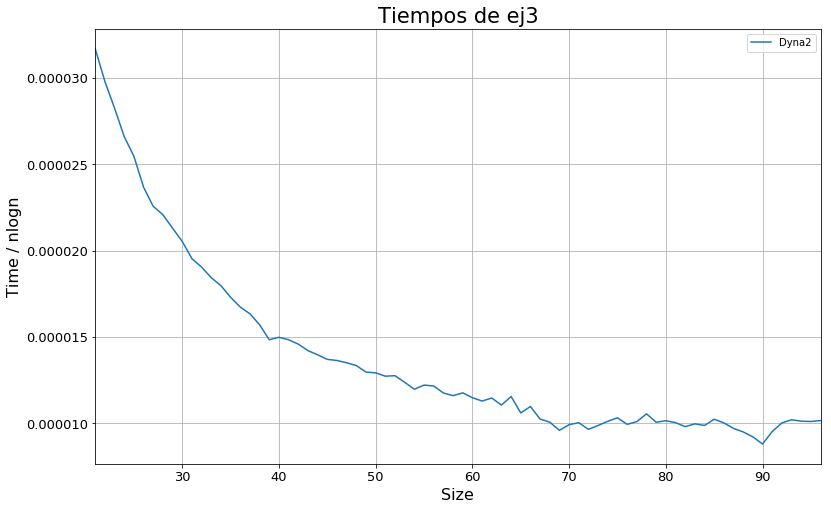

In [17]:
ddyna = pd.read_csv("./timesEj3.csv")
ddyna['Dyna2'] = ddyna['Time'] / ddyna['Size']**(2)*ddyna['Size'].apply(lambda x: log(x)  if x >= 0 else -1)
del ddyna['Time']
sizedyna = ddyna.loc[ddyna['Size'] > 20].groupby('Size')
dyna = sizedyna.median().plot.line(fontsize=13, figsize=(13,8), grid=True)
dyna.set_title("Tiempos de ej3", fontsize=21)
dyna.set_ylabel("Time / nlogn", fontsize=16)
dyna.set_xlabel("Size", fontsize=16)